In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

import pickle
import glob

In [2]:
RESULTS_DIR = './artifacts/model_training/cv_results/'
CLASS_LABELS = ['W', 'N1', 'N2', 'N3', 'R']

# 1. Global accuracy

In [3]:
def get_avg_accuracy(model_type):
    # Get filepaths for performance files
    performance_filepaths = glob.glob(RESULTS_DIR+model_type+'/performance*')
    
    # Get average accuracy
    accuracies = []
    for performance_f in performance_filepaths:
        with open(performance_f, 'rb') as f:
            accuracies.append(pickle.load(f)['accuracy'])
    
    fig = plt.figure(figsize=(12,7))
    plt.scatter(
        [model_type]*len(accuracies),
        accuracies,
        marker='X',
        label='folds'
    )
    plt.scatter(
        [model_type],
        [np.mean(accuracies)],
        marker='o',
        color='red',
        label='avg: {}%'.format(
            round(100*np.mean(accuracies), 2)
        ),
        s=100
    )
    plt.title('Accuracies for model type: {}'.format(model_type))
    plt.legend()

## a. Full

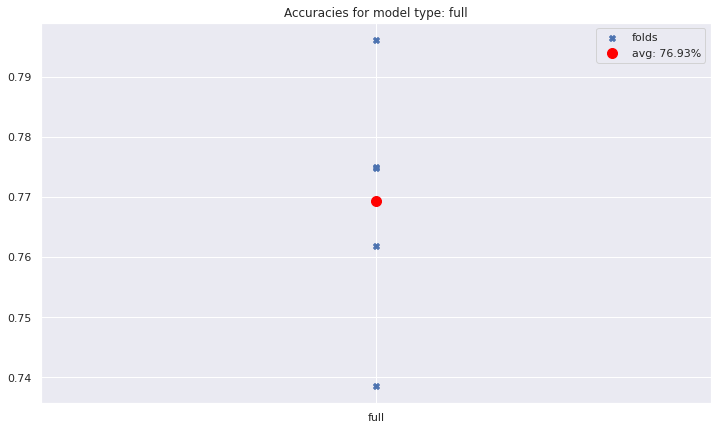

In [4]:
MODEL_TYPE = 'full'
accuracy = get_avg_accuracy(model_type=MODEL_TYPE)
accuracy

## b. Feats

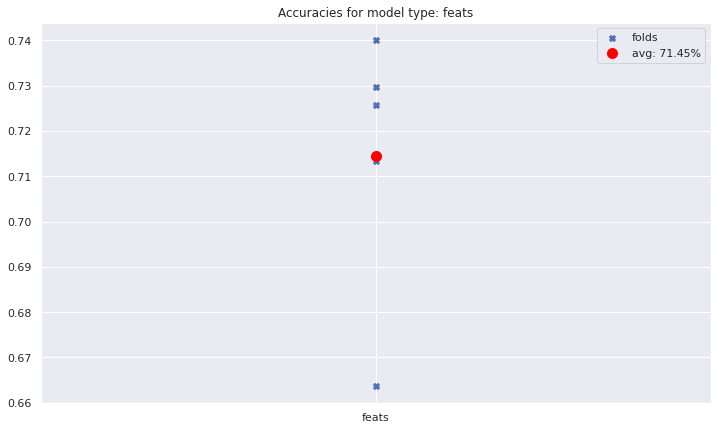

In [5]:
MODEL_TYPE = 'feats'
accuracy = get_avg_accuracy(model_type=MODEL_TYPE)
accuracy

## c. Raw

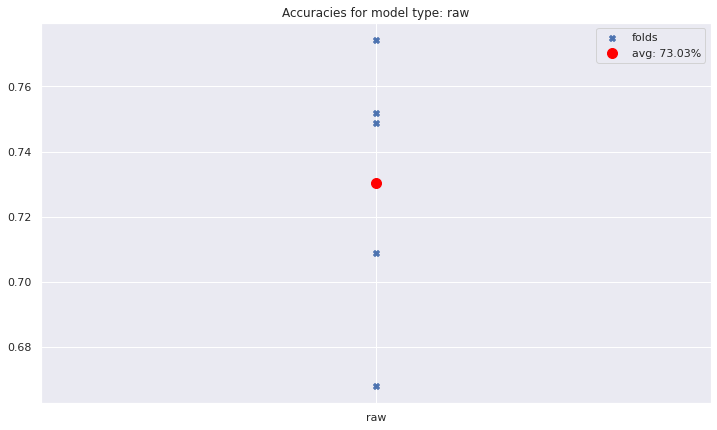

In [6]:
MODEL_TYPE = 'raw'
accuracy = get_avg_accuracy(model_type=MODEL_TYPE)
accuracy

# 2. Training times

In [7]:
def get_training_times(model_type):
    # Get filepaths for performance files
    performance_filepaths = glob.glob(RESULTS_DIR+model_type+'/performance*')
    
    # Get average accuracy
    train_times = []
    for performance_f in performance_filepaths:
        with open(performance_f, 'rb') as f:
            train_times.append(pickle.load(f)['training_time']//60)
    
    fig = plt.figure(figsize=(12,7))
    plt.scatter(
        [model_type]*len(train_times),
        train_times,
        marker='X',
        label='folds'
    )
    plt.scatter(
        [model_type],
        [np.mean(train_times)],
        marker='o',
        color='red',
        label='avg: {} minutes'.format(np.mean(train_times)),
        s=100
    )
    plt.title('Training times for model type: {}'.format(model_type))
    plt.legend()
    
    

## a. Full

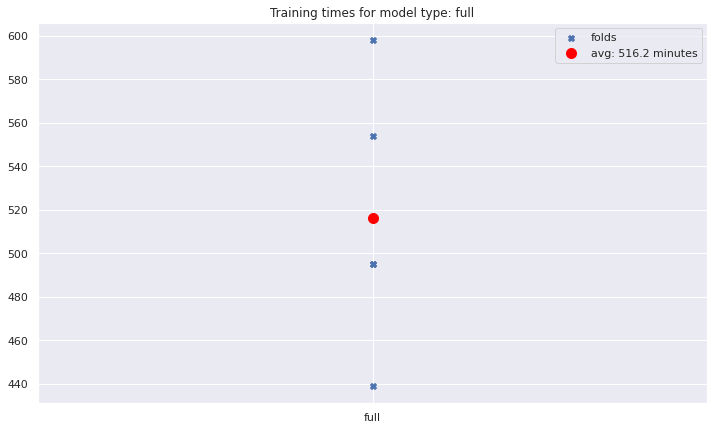

In [8]:
MODEL_TYPE='full'
get_training_times(MODEL_TYPE)

## b. Feats

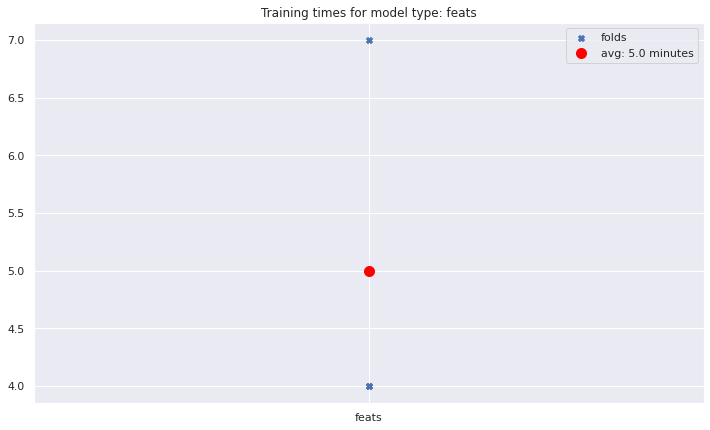

In [9]:
MODEL_TYPE='feats'
get_training_times(MODEL_TYPE)

## c. Raw

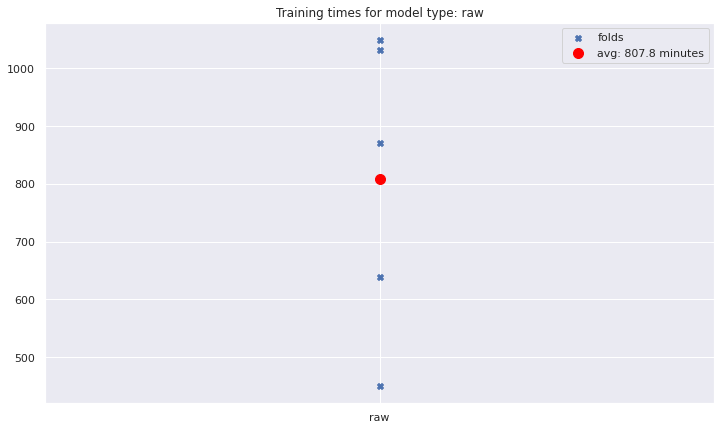

In [10]:
MODEL_TYPE='raw'
get_training_times(MODEL_TYPE)

# 3. Total confusion matrices

In [11]:
def get_total_confusion(model_type):
    # Get filepaths for performance files
    performance_filepaths = glob.glob(RESULTS_DIR+model_type+'/performance*')
    
    # Initialize confusion matrix
    confusion_matrix = pd.DataFrame(
        index=CLASS_LABELS,
        columns=CLASS_LABELS,
        data=np.zeros((len(CLASS_LABELS), len(CLASS_LABELS)))
    )
    
    # Get avg confusion matrix
    for performance_f in performance_filepaths:
        with open(performance_f, 'rb') as f:
            confusion_matrix = confusion_matrix + pickle.load(f)['confusion_matrix']
    
    # Get avg confusion matrix scaled by true samples
    confusion_matrix_scaled = confusion_matrix.divide(
        confusion_matrix.sum(axis=1),
        axis='rows'
    )
    
    return confusion_matrix, confusion_matrix_scaled
    

## a. Full

In [12]:
MODEL_TYPE = 'full'
confusion, confusion_scaled = get_total_confusion(model_type=MODEL_TYPE)

In [13]:
confusion

,W,N1,N2,N3,R
W,58877.0,1553.0,976.0,110.0,973.0
N1,5709.0,4246.0,8602.0,204.0,2761.0
N2,1896.0,1582.0,59613.0,3620.0,2421.0
N3,121.0,27.0,3611.0,9270.0,10.0
R,3249.0,1937.0,4808.0,139.0,15702.0


In [14]:
confusion_scaled

,W,N1,N2,N3,R
W,0.942198,0.024852,0.015619,0.001760,0.015571
N1,0.265263,0.197286,0.399684,0.009479,0.128287
N2,0.027426,0.022884,0.862307,0.052364,0.035020
N3,0.009280,0.002071,0.276938,0.710944,0.000767
R,0.125760,0.074976,0.186104,0.005380,0.607780


<AxesSubplot:>

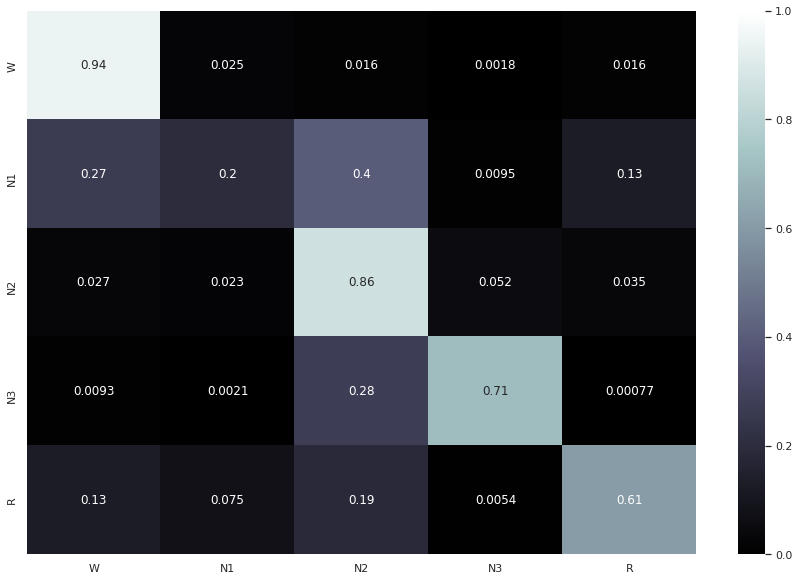

In [15]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(confusion_scaled, annot=True, cmap='bone', vmin=0, vmax=1)

## b. Feats

In [16]:
MODEL_TYPE = 'feats'
confusion, confusion_scaled = get_total_confusion(model_type=MODEL_TYPE)

In [17]:
confusion

,W,N1,N2,N3,R
W,50937.0,2474.0,5746.0,286.0,3046.0
N1,5154.0,3611.0,9532.0,164.0,3061.0
N2,1995.0,1008.0,60246.0,3421.0,2462.0
N3,338.0,8.0,4717.0,7943.0,33.0
R,3229.0,1462.0,6614.0,65.0,14465.0


In [18]:
confusion_scaled

,W,N1,N2,N3,R
W,0.815135,0.039591,0.091952,0.004577,0.048745
N1,0.239476,0.167782,0.442896,0.007620,0.142227
N2,0.028858,0.014581,0.871463,0.049485,0.035613
N3,0.025922,0.000614,0.361761,0.609172,0.002531
R,0.124985,0.056590,0.256009,0.002516,0.559899


<AxesSubplot:>

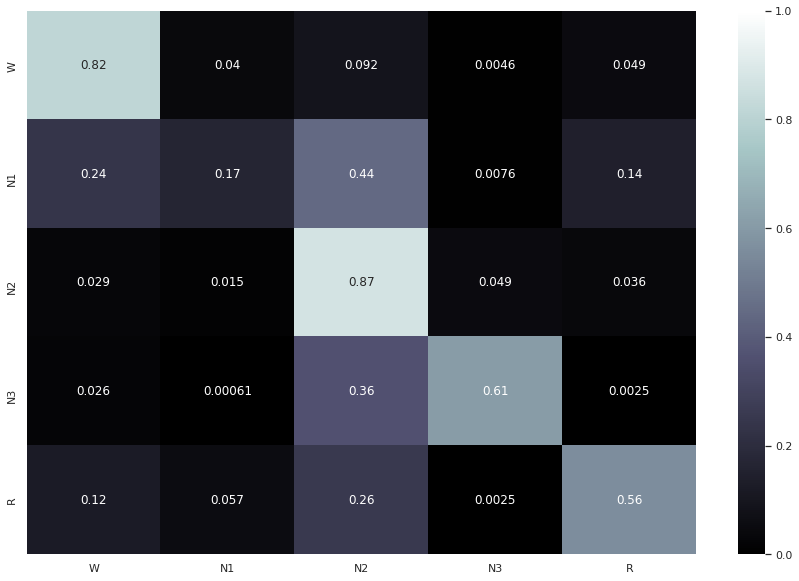

In [19]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(confusion_scaled, annot=True, cmap='bone', vmin=0, vmax=1)

## c. Raw

In [20]:
MODEL_TYPE = 'raw'
confusion, confusion_scaled = get_total_confusion(model_type=MODEL_TYPE)

In [21]:
confusion

,W,N1,N2,N3,R
W,59660.0,1145.0,581.0,41.0,1062.0
N1,7595.0,3802.0,6107.0,303.0,3715.0
N2,2496.0,3083.0,52254.0,5704.0,5595.0
N3,121.0,43.0,2716.0,10023.0,136.0
R,4600.0,2474.0,4082.0,127.0,14552.0


In [22]:
confusion_scaled

,W,N1,N2,N3,R
W,0.954728,0.018323,0.009298,0.000656,0.016995
N1,0.352895,0.176656,0.283756,0.014079,0.172614
N2,0.036105,0.044596,0.755858,0.082509,0.080932
N3,0.009280,0.003298,0.208298,0.768694,0.010430
R,0.178053,0.095762,0.158003,0.004916,0.563267


<AxesSubplot:>

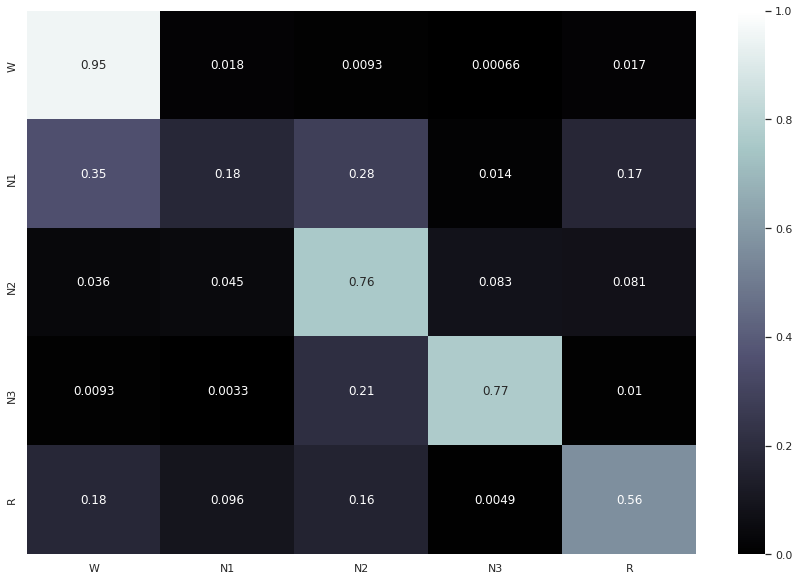

In [23]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(confusion_scaled, annot=True, cmap='bone', vmin=0, vmax=1)

# 4. Per-class precision, recall and F1

In [24]:
def get_avg_class_metrics(model_type):
    
    # Get filepaths for performance files
    performance_filepaths = glob.glob(RESULTS_DIR+model_type+'/performance*')

    # Initialize confusion matrix

    # Initialize dfs for holding class values
    class_metrics = pd.DataFrame(
        index=list(range(len(CLASS_LABELS))),
        data={
            'class': CLASS_LABELS
        }
    )
    class_values = pd.DataFrame(
        index=list(range(len(CLASS_LABELS))),
        columns=['precision', 'recall', 'f1'],
        data=np.zeros((len(CLASS_LABELS), 3))
    )
    
    # Get avg value for precision, recall and f1 along folds
    for performance_f in performance_filepaths:
        with open(performance_f, 'rb') as f:
            class_values = class_values + pickle.load(f)['class_metrics'].drop(columns='class')
    class_values = class_values/len(performance_filepaths)
    class_metrics = pd.concat(
        [
            class_metrics,
            class_values
        ],
        axis=1
    )
    
    return class_metrics

## a. Full

In [25]:
MODEL_TYPE='full'
class_metrics = get_avg_class_metrics(model_type=MODEL_TYPE)
class_metrics

,class,precision,recall,f1
0,W,0.841188,0.941361,0.888313
1,N1,0.459045,0.199096,0.275889
2,N2,0.768240,0.863014,0.812522
3,N3,0.702468,0.703232,0.693740
4,R,0.718213,0.606997,0.657517


## b. Feats

In [26]:
MODEL_TYPE='feats'
class_metrics = get_avg_class_metrics(model_type=MODEL_TYPE)
class_metrics

,class,precision,recall,f1
0,W,0.824713,0.814136,0.816027
1,N1,0.421806,0.169386,0.240261
2,N2,0.696544,0.872085,0.773167
3,N3,0.661271,0.600940,0.627145
4,R,0.625478,0.557653,0.589079


## c. Raw

In [27]:
MODEL_TYPE='raw'
class_metrics = get_avg_class_metrics(model_type=MODEL_TYPE)
class_metrics

,class,precision,recall,f1
0,W,0.800540,0.953119,0.869784
1,N1,0.375207,0.174897,0.229368
2,N2,0.797757,0.756870,0.772308
3,N3,0.631654,0.758219,0.678681
4,R,0.590831,0.562054,0.572699


# 5. Training history

In [36]:
def get_training_history(model_type):
    
    # Get filepaths for performance files
    history_filepaths = glob.glob(RESULTS_DIR+model_type+'/history*')
    
    # Get training history for each fold
    training_history = pd.DataFrame()
    for history_f in history_filepaths:
        training_history = pd.concat(
            [
                training_history,
                pd.read_csv(history_f)
            ],
            axis=0
        ).sort_values(
            by=['fold', 'epoch'],
            ascending=True
        ).reset_index(
            drop=True
        )
        
    # Get average number of epochs
    avg_epochs = training_history.groupby(
        by='fold',
        as_index=False
    ).agg({
        'epoch':'count'
    }).epoch.mean()
    print('-'*100)
    print('Average number of epochs for model type {}: {}'.format(model_type, avg_epochs))
    print('-'*100)
    
    # Create plot
    fig, (ax1, ax2) = plt.subplots(
        nrows=2,
        ncols=1,
        figsize=(25,15)
    )
    
    # Ax1
    sns.lineplot(
        data=training_history,
        x='epoch',
        y='categorical_accuracy',
        hue='fold',
        ax=ax1
    )
    ax1.set_title('Train')
    
    # Ax2
    sns.lineplot(
        data=training_history,
        x='epoch',
        y='val_categorical_accuracy',
        hue='fold',
        ax=ax2
    )
    ax2.set_title('Valid')

## a. Full

----------------------------------------------------------------------------------------------------
Average number of epochs for model type full: 46.6
----------------------------------------------------------------------------------------------------


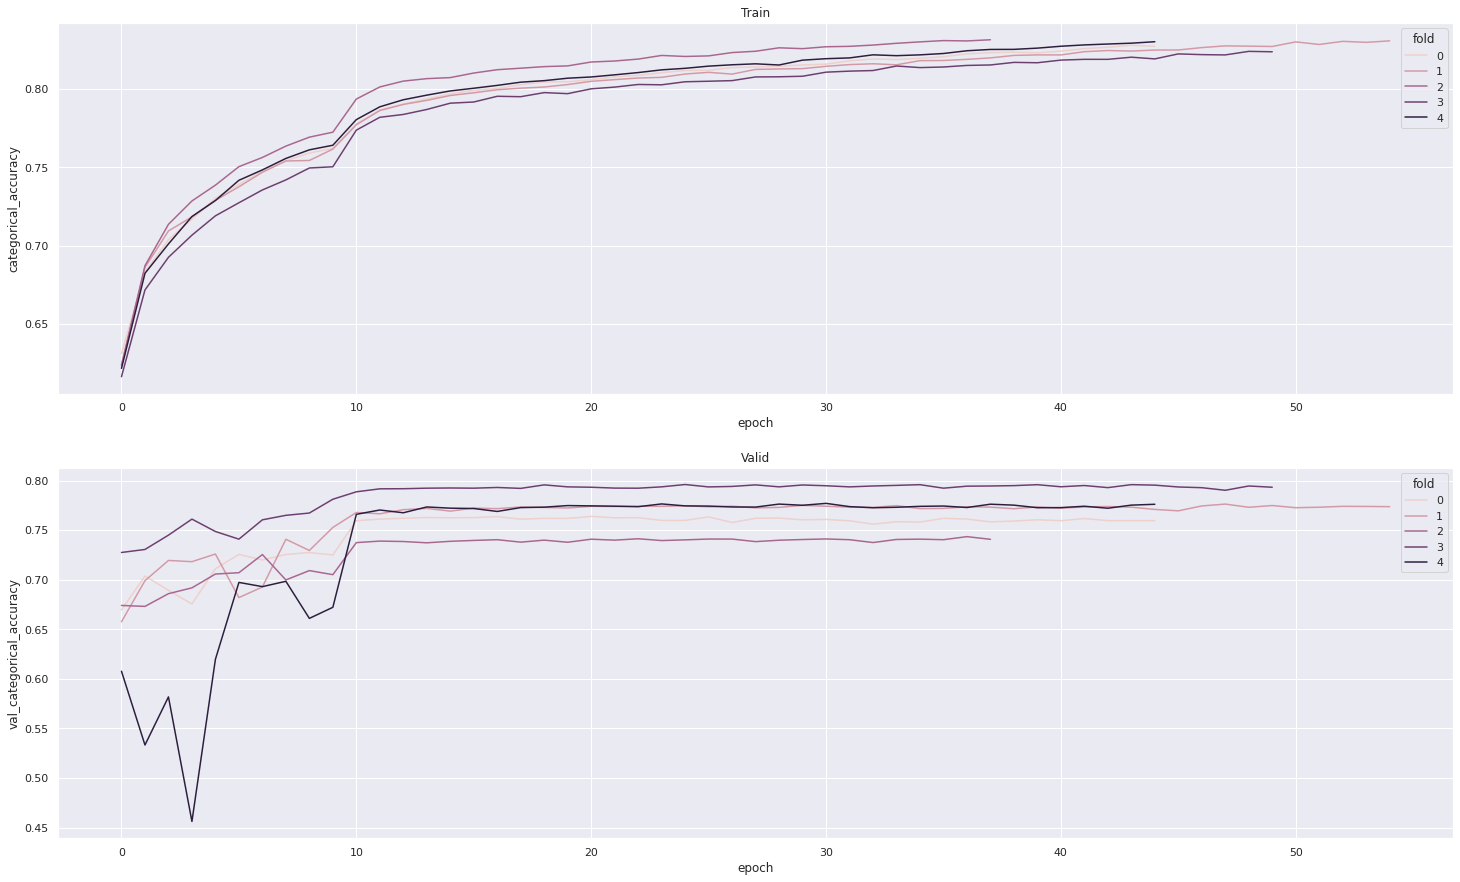

In [37]:
get_training_history('full')

## b. Feats

----------------------------------------------------------------------------------------------------
Average number of epochs for model type feats: 47.6
----------------------------------------------------------------------------------------------------


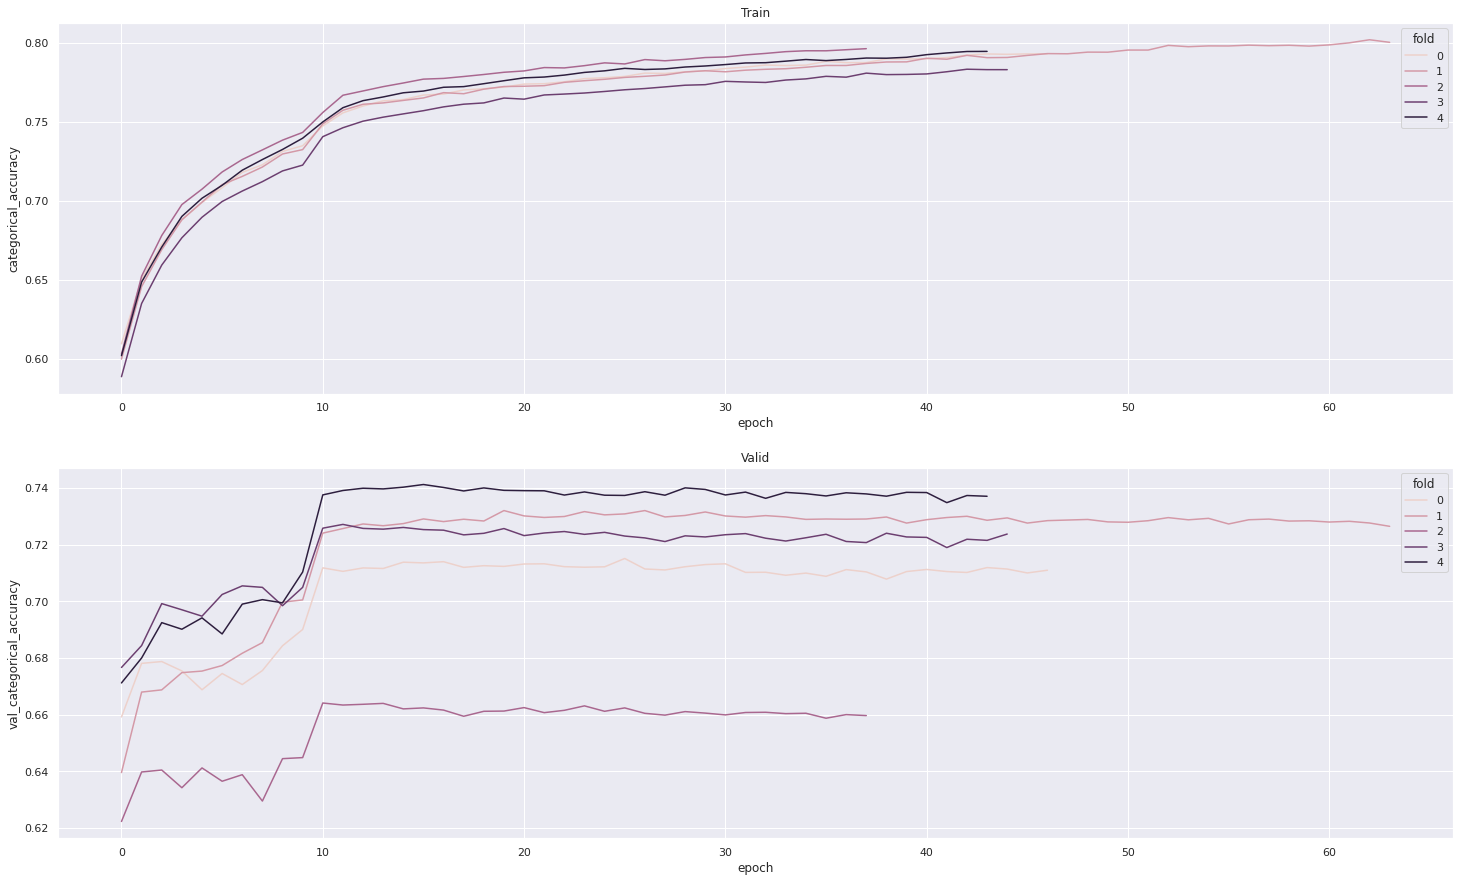

In [38]:
get_training_history('feats')

## c. Raw

----------------------------------------------------------------------------------------------------
Average number of epochs for model type raw: 74.0
----------------------------------------------------------------------------------------------------


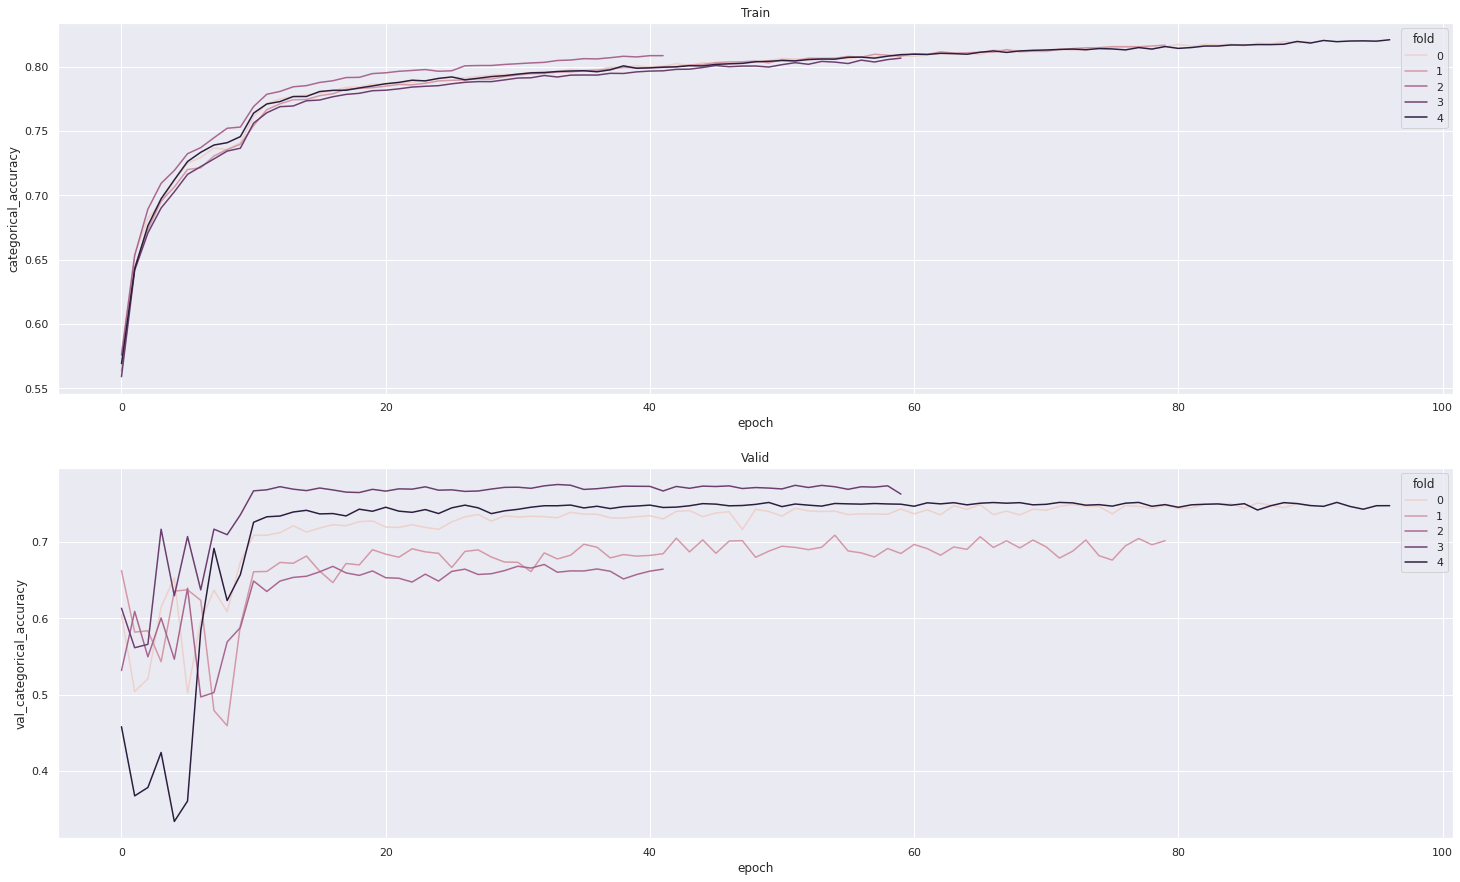

In [39]:
get_training_history('raw')